In this notebook we will explore the harship index for Woodlawn, Chicago in relationship to other Chicago neighborhoods.

In [2]:
import pandas as pd
import numpy as np

1) We'll use pandas to import the data file 'HI20142017.csv' which summarizes information from the websites https://greatcities.uic.edu/wp-content/uploads/2016/07/GCI-Hardship-Index-Fact-SheetV2.pdf (2010-2014)  https://greatcities.uic.edu/wp-content/uploads/2019/12/Hardship-Index-Fact-Sheet-2017-ACS-Final-1.pdf (2013-2017).

In [17]:
raw_hardship=pd.read_excel('HI20142017.xlsx')
raw_hardship.head(1)

,Community,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17
0,Rogers Park,39.7,9.3,16.4,27.2,7.1,24.0,24323,39.4,7.7,9.5,26.2,6.6,22.6,25874.0


2) We'll make "Community" the index.

In [18]:
raw_hardship=raw_hardship.set_index("Community",drop=True)
raw_hardship.head(1)

,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17
Community,,,,,,,,,,,,,,
Rogers Park,39.7,9.3,16.4,27.2,7.1,24.0,24323,39.4,7.7,9.5,26.2,6.6,22.6,25874.0


3) Let's separate the 2014 and 2017 hardship index (HI) data.

In [20]:
HI14=raw_hardship[["HI14","UNEMP14","NOHS14","DEP14","HOUS14","POV14","INC14"]]
HI17=raw_hardship[["HI17","UNEMP17","NOHS17","DEP17","HOUS17","POV17","INC17"]]
HI14.head(1)

,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14
Community,,,,,,,
Rogers Park,39.7,9.3,16.4,27.2,7.1,24.0,24323


4) We'll define a function which uses the data in HI14 and HI17 to makes scatterplots of (index1,index2).

In [35]:
def makescatterplot(HI14,HI17,index1,index2,xaxislabel,yaxislabel,xrange,title):
    #import libraries
    import matplotlib
    import matplotlib.pyplot as plt
    
    #create a new figure
    fig=plt.figure() 
    
    #plot the 2014 points with size given by the HI value
    ax=HI14.plot(x=index1+'14', y=index2+'14', kind='scatter',c=['gray'],xticks=xrange, s=2*HI14['HI14'], alpha=.25,figsize=[16,6])
   
    #Add labels to the HI14 points
    for com in HI14.index:
        if com != 'Woodlawn':
            plt.gca().text(HI14.loc[com,index1+'14'], HI14.loc[com,index2+'14']+1,com,ha='center', color='k', fontsize=5)
        else:
            plt.gca().text(HI14.loc[com,index1+'14'], HI14.loc[com,index2+'14']+1,com,ha='center', color='k', fontsize=25)
            plt.gca().text(HI14.loc[com,index1+'14'],HI14.loc[com,index2+'14']-.5,'x',ha='center', color='k', fontsize=20)
    
    #Add Labels for the HI17 points   
    for com in HI17.index:
        if com == 'Woodlawn':       
            plt.gca().text(HI17.loc[com,index1+'17'], HI17.loc[com,index2+'17']+1,com,ha='center', color='r', fontsize=25)
            plt.gca().text(HI17.loc[com,index1+'17'], HI17.loc[com,index2+'17']-.5,'x',ha='center', color='r', fontsize=20)
        else:
            plt.gca().text(HI17.loc[com,index1+'17'], HI17.loc[com,index2+'17']+1,com,ha='center', color='r', fontsize=5)

    #Add a Title
    plt.title(title,size=25)
    plt.xlabel(xaxislabel,size=15)
    plt.ylabel(yaxislabel,size=15)

    #Save the figure to a file
    plt.savefig(index1+index2+'.png')

5) Unemployment vs. No High School Diploma

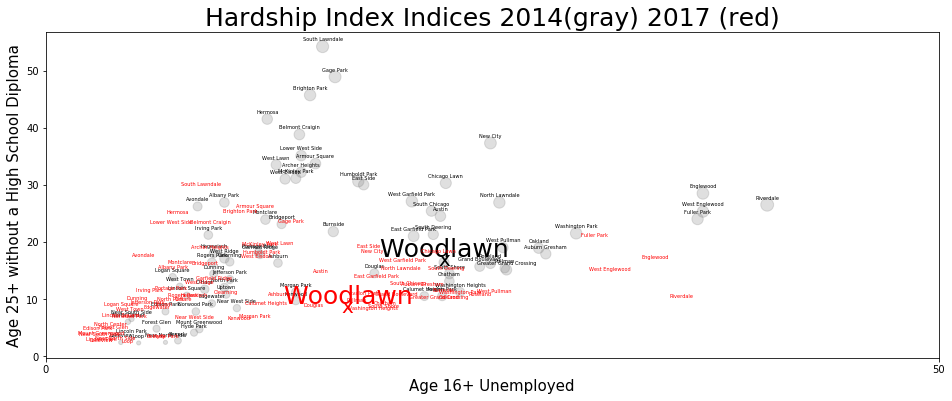

In [36]:
makescatterplot(HI14,HI17,"UNEMP","NOHS","Age 16+ Unemployed","Age 25+ without a High School Diploma",[0,50],"Hardship Index Indices 2014(gray) 2017 (red)")

6) Dependency vs. Per Capita Income

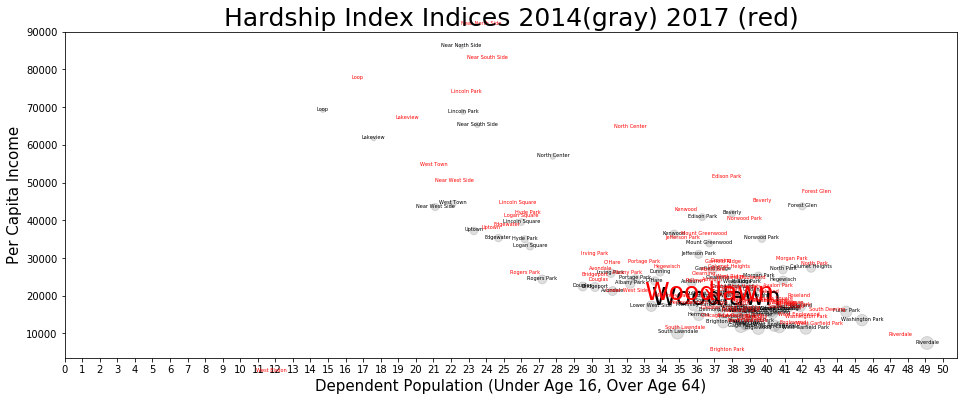

In [40]:
makescatterplot(HI14,HI17,"DEP","INC","Dependent Population (Under Age 16, Over Age 64)","Per Capita Income",np.arange(0,51,1),"Hardship Index Indices 2014(gray) 2017 (red)")

7) Below Poverty Line and HI

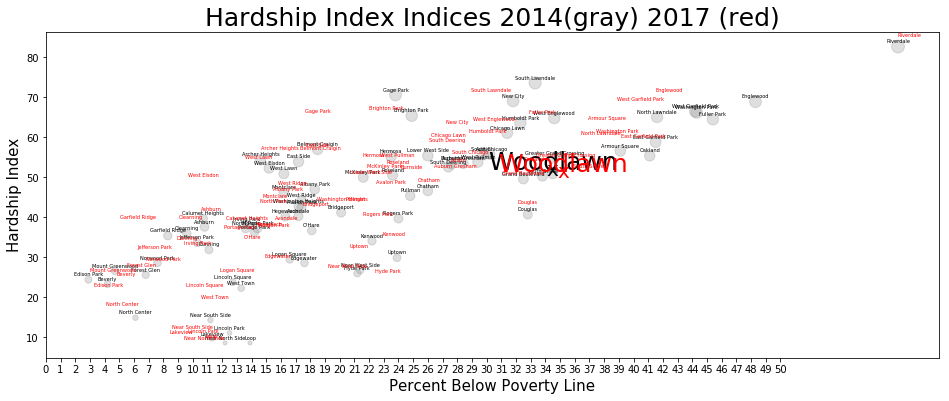

In [41]:
makescatterplot(HI14,HI17,"POV","HI","Percent Below Poverty Line","Hardship Index",np.arange(0,51,1),"Hardship Index Indices 2014(gray) 2017 (red)")